In [3]:
import torch
import time
from snn_delays.snn import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils import train, get_device
from snn_delays.utils.test_behavior import tb_save_max_last_acc

'''
SHD dataset as in ablation study
'''

device = get_device()

# for reproducibility
torch.manual_seed(10)

dataset = 'shd'
total_time = 50
batch_size = 1024

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()
          
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'normal'
delay = None
ckpt_dir = 'exp3_shd50_rnn' 

mask = 1.0*torch.eye(64)

snn = SNN(dataset_dict=dataset_dict, structure=(64, 2), connection_type='r',
    delay=delay, delay_type='h', tau_m = tau_m,
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=False, mask=mask)
snn.input2spike_th = None 

Running on: cuda:0
[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918


tensor([[-0.0504, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0376, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0302,  ..., -0.0000, -0.0000, -0.0000],
        ...,
        [-0.0000, -0.0000, -0.0000,  ..., -0.0825, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.1040, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.1179]],
       device='cuda:0')


<Axes: xlabel='input', ylabel='output'>

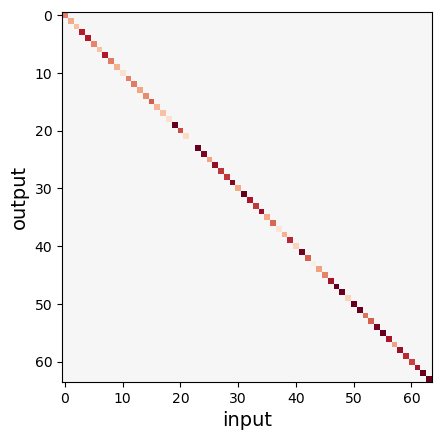

In [4]:
from snn_delays.utils.visualization_utils import plot_param

print(snn.f1_f1.linear.weight.data)

plot_param(snn.f1_f1.linear, mode='2D', vminmax=0.1)

In [5]:
snn.to(device)
train(snn, train_loader, test_loader, lr, num_epochs, dropout=0.0, 
    test_behavior=tb_save_max_last_acc, ckpt_dir=ckpt_dir, scheduler=(100, 0.95), test_every=1)

training shd50_SNN_l2_1d1.t7 for 50 epochs...
Epoch [1/50], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to re

Step [2/7], Loss: 3.23462
l1_score: 0
Step [4/7], Loss: 3.24044
l1_score: 0
Step [6/7], Loss: 3.32782
l1_score: 0
Step [8/7], Loss: 3.23250
l1_score: 0
Time elasped: 37.763875246047974
Test Loss: 4.791606903076172
Avg spk_count per neuron for all 50 time-steps 4.326743125915527
Avg spk per neuron per layer [8.803410722173146, 8.503561174911662]
Test Accuracy of the model on the test samples: 6.228

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp3_shd50_rnn
Gradient norm for 'tau_m_1': 0.0001
Gradient norm for 'tau_m_2': 0.0009
Gradient norm for 'tau_m_o': 0.0813
Gradient norm for 'f0_f1.weight': 0.0598
Gradient norm for 'f1_f1.linear.weight': 0.0018
Gradient norm for 'f1_f2.weight': 0.1759
Gradient norm for 'f2_f2.weight': 0.1856
Gradient norm for 'f2_o.weight': 2.0149
saving max acc: 6.22791519434629
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\exp3_shd50_rnn
Epoch [2/50], learning_rates 0.00100

tensor([[-0.0881, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000,  0.0075, -0.0000,  ..., -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0290,  ..., -0.0000, -0.0000, -0.0000],
        ...,
        [-0.0000, -0.0000, -0.0000,  ..., -0.0883, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000,  0.0364, -0.0000],
        [-0.0000, -0.0000, -0.0000,  ..., -0.0000, -0.0000, -0.1238]],
       device='cuda:0')


<Axes: xlabel='input', ylabel='output'>

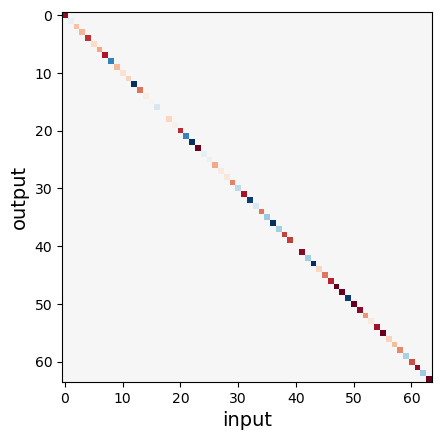

In [7]:
print(snn.f1_f1.linear.weight.data)
plot_param(snn.f1_f1.linear, mode='2D', vminmax=0.1)